In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib notebook

from utils import *
import sys
sys.path.append('/Users/theoares/lqcd/utilities')
# from plottools import *
import plottools as pt
from scipy.integrate import quad

# Input from Will's notebook

In [2]:
import sys
import autograd.numpy as np
# import numpy as np
import pandas as pd
import itertools
import gmpy2 as gmp
import seaborn as sns
from importlib import reload

sys.path.append('/Users/theoares/lqcd_analysis/lqcd_analysis')
import visualize as Plt

sys.path.append('/Users/theoares/inverse_problems/inverse_problems')
from inverse_problems import nevanlinna as nv

In [3]:
def pole(m, z):
    return 1 / (m - z)

def analytic_dft(m, z, beta):
    prefactor = -1*(1 + np.exp(-m*beta))
    pole1 = 1/(np.exp(z-m) - 1)
    pole2 = 1/(np.exp(z+m) - 1)
    return prefactor * (pole1 + pole2)

def analytic_ft(z, m, beta):
    prefactor = -1*(1 + np.exp(-m*beta))
    pole1 = 1/(z - m)
    pole2 = 1/(z + m)
    return prefactor * (pole1 + pole2)
#     return prefactor * pole1

def unstable_pole(z, m, gamma):
    mpi = 0.140
    return 0.25*(1 - 4*mpi**2/z**2)**0.5/(z - (m - 1j*gamma))

def kinematic_feature(z):
    z = z + 0*1j
    return -1*(0.25 - z)**0.5

In [4]:
def matsubara(beta, boson=False):
    n = np.arange(beta)
    if boson:
         return 2*n*np.pi/beta * 1j
    return (2*n+1)*np.pi/beta * 1j

def plot_imag_data(freq, ng, axarr):
    """
    Plots imaginary-domain data.
    """
    ax1, ax2, ax3 = axarr
    Plt.errorbar(ax1, freq.real, freq.imag, fmt='.')
    Plt.errorbar(ax2, freq.imag, ng.real, fmt='.')
    Plt.errorbar(ax3, freq.imag, ng.imag, fmt='.')
    ax1.set_title("Matsubara frequencies")
    ax2.set_title(r"$\Re\,G_E(i\omega)$")
    ax3.set_title(r"$\Im\,G_E(i\omega)$")
    return axarr

def plot_moebius(z, ax, **kwargs):
    h = nv.moebius(z)
    Plt.errorbar(ax, h.real, h.imag, fmt='.', **kwargs)    
    return ax

def plot_unit_circle(ax, **kwargs):
    x = np.linspace(-1, 1, num=100)
    Plt.errorbar(ax, x, np.sqrt(1-x**2), **kwargs)
    Plt.errorbar(ax, x, -np.sqrt(1-x**2), **kwargs)
    return ax    


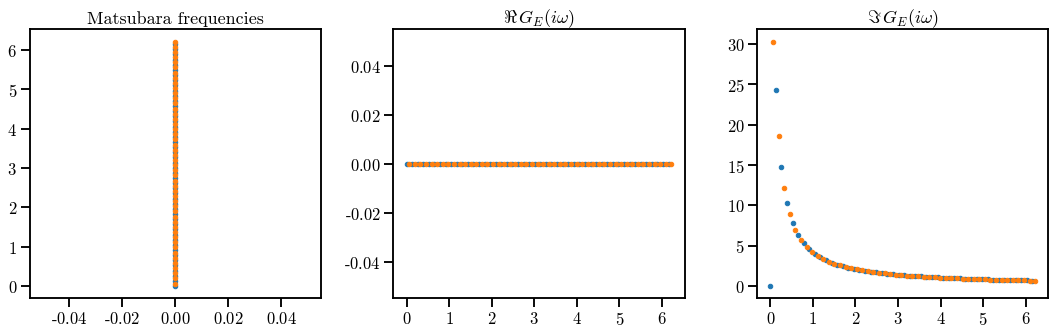

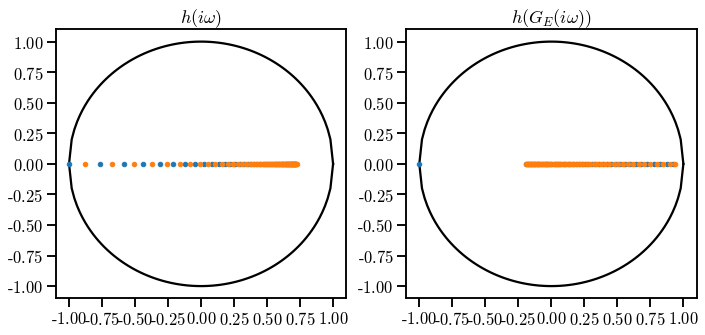

In [5]:
beta = 48
m = 0.05

freq_b = matsubara(beta, boson=True)
freq_f = matsubara(beta, boson=False)

ng_b = np.zeros(len(freq_b))
for mm in [0.05, 0.1]:
    ng_b = ng_b + analytic_ft(freq_b, mm, beta)

# ng_b = analytic_ft(freq_b, m, beta) + analytic_ft(freq_b, 2*m, beta) + analytic_ft(freq_b, 3*m, beta)
ng_f = analytic_ft(freq_f, m, beta) + analytic_ft(freq_f, 2*m, beta)

# Plot imaginary-domain data
with sns.plotting_context("talk"):
    fig, axarr = plt.subplots(ncols=3, figsize=(15,5))
    plot_imag_data(freq_b, ng_b, axarr)    
    plot_imag_data(freq_f, ng_f, axarr)
    fig.tight_layout()
    
# Plot Moebius tranform of imaginary-domain data
# The result should lie within the unit disk
with sns.plotting_context("talk"):

    fig, axarr = Plt.subplots(ncols=2, figsize=(10,5))
    ax1, ax2 = axarr
    
    plot_unit_circle(ax1, color='k')
    plot_unit_circle(ax2, color='k')

    plot_moebius(freq_b, ax=ax1)
    plot_moebius(freq_f, ax=ax1)

    plot_moebius(ng_b, ax=ax2)
    plot_moebius(ng_f, ax=ax2)

    ax1.set_title(r"$h(i\omega)$")
    ax2.set_title(r"$h(G_E(i\omega))$")
    
    fig.tight_layout()    

Num: (-0.04775341834568547+0j)
Denom: (0.06533235624606726+0j)
Num: (-0.009478078746047447+0j)
Denom: (0.009898968971914154+0j)
Num: (-0.00021763147073206035+0j)
Denom: (0.00022779789987859012+0j)
Num: (-4.9954365473059426e-06+0j)
Denom: (4.995436547541865e-06+0j)
Num: (-2.220446049250313e-16+0j)
Denom: (9.71445146547012e-17+0j)
Num: (-4.440892098500626e-16+0j)
Denom: (-1.249000902703301e-16+0j)
Num: (1.2490009027033011e-15+0j)
Denom: (2.7755575615628914e-17+0j)
Num: (-3.552713678800501e-15+0j)
Denom: (-7.743805596760467e-15+0j)
Num: (2.4868995751603507e-14+0j)
Denom: (-1.609823385706477e-15+0j)
Num: (-4.796163466380676e-14+0j)
Denom: (4.263256414560601e-14+0j)
Num: (1.4210854715202004e-14+0j)
Denom: (-8.881784197001252e-16+0j)
Num: (-8.526512829121202e-14+0j)
Denom: (7.105427357601002e-15+0j)
Num: (1.3642420526593924e-12+0j)
Denom: (-4.263256414560601e-14+0j)
Num: (-7.275957614183426e-12+0j)
Denom: (2.2737367544323206e-12+0j)
Num: (4.3655745685100555e-11+0j)
Denom: (9.094947017729282e

/Users/theoares/inverse_problems/inverse_problems/nevanlinna.py:131: RuntimeWarning: divide by zero encountered in cdouble_scalars
  self.phi[j] = (self.imag.h[j]*d - b) / (a - self.imag.h[j]*c)
/Users/theoares/inverse_problems/inverse_problems/nevanlinna.py:131: RuntimeWarning: invalid value encountered in cdouble_scalars
  self.phi[j] = (self.imag.h[j]*d - b) / (a - self.imag.h[j]*c)
/Users/theoares/inverse_problems/inverse_problems/nevanlinna.py:107: RuntimeWarning: invalid value encountered in cdouble_scalars
  [np.conjugate(self.phi[idx]) * gamma, 1.0]],
/Users/theoares/inverse_problems/inverse_problems/nevanlinna.py:126: RuntimeWarning: invalid value encountered in matmul
  arr = arr @ self.theta_matrix(idx=k, z=y[j])
/Users/theoares/inverse_problems/inverse_problems/nevanlinna.py:161: RuntimeWarning: invalid value encountered in matmul
  arr = arr @ self.theta_matrix(idx=idx, z=z)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_ba

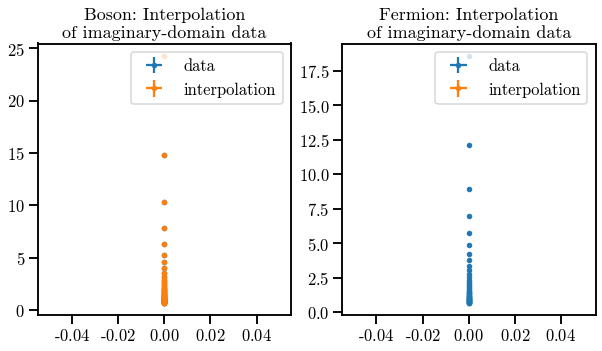

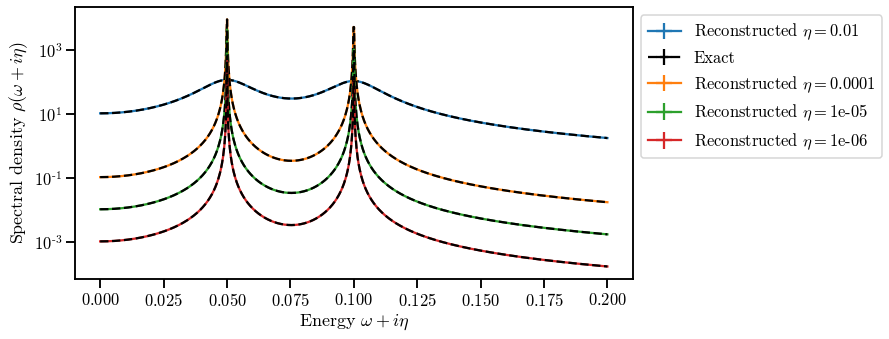

In [6]:
reload(nv)

xmin = 1
xmax = beta

# Create interpolants
interp_b = nv.Nevanlinna(freq_b[xmin:xmax], ng_b[xmin:xmax])    
interp_f = nv.Nevanlinna(freq_f[xmin:xmax], ng_f[xmin:xmax])

# Test interpolation on imaginary-domain data
test_b = np.array([interp_b.schur(z, map_back=True) for z in freq_b[xmin:xmax]])
test_f = np.array([interp_f.schur(z, map_back=True) for z in freq_f[xmin:xmax]])

with sns.plotting_context("talk"):
    fig, axarr = Plt.subplots(ncols=2, figsize=(10, 5))
    ax1, ax2 = axarr
    Plt.errorbar(ax1, ng_b[xmin:xmax].real, ng_b[xmin:xmax].imag, fmt='.', label='data')
    Plt.errorbar(ax1, test_b.real, test_b.imag, fmt='.', label='interpolation')

    Plt.errorbar(ax2, ng_f[xmin:xmax].real, ng_f[xmin:xmax].imag, fmt='.', label='data')
    Plt.errorbar(ax2, test_f.real, test_f.imag, fmt='.', label='interpolation')

    ax1.set_title("Boson: Interpolation\nof imaginary-domain data")
    ax2.set_title("Fermion: Interpolation\nof imaginary-domain data")
    ax1.legend()
    ax2.legend()

# Solve the inverse problem via extrapolation
with sns.plotting_context('talk'):
    fig, ax = Plt.subplots(1, figsize=(10, 5))

    for eta in [1e-2, 1e-4, 1e-5, 1e-6]:
        # Extrapolate the interpolation toward the real axis
        omega, rho = interp_b(start=0, stop=0.2, num=1000, eta=eta)
        sign = +1 if eta > 0 else -1
        Plt.errorbar(ax, omega.real, rho.imag*sign, label=r"Reconstructed $\eta=$"+str(eta))

        label = 'Exact' if eta == 1e-2 else None
        y = 0
        for m in [0.05, 0.1]:
            y = y + analytic_ft(omega, m, beta)
        y = y.imag
        Plt.errorbar(ax, x=omega.real, y=y*sign, fmt='--', color='k', label=label)
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.set_xlabel(r"Energy $\omega + i \eta$")
    ax.set_ylabel(r"Spectral density $\rho(\omega + i \eta)$")
    
    

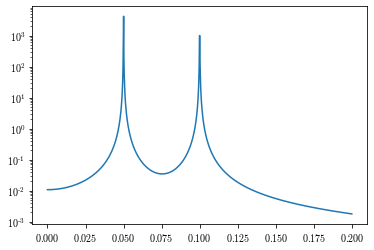

In [7]:
# just to make sure I know how the code works, reproduce with η = 1e-5
plt.figure()
ω, ρ = interp_b(start = 0.0, stop = 0.2, num = 1000, eta = 1e-5)
plt.plot(np.real(ω), np.imag(ρ))
plt.yscale('log')
plt.show()

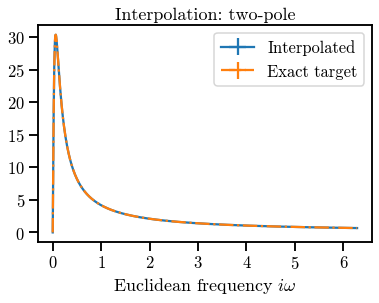

In [8]:
with sns.plotting_context("talk"):
    z = np.linspace(0, 2*np.pi, num=1000)*1j + 1e-4
    y = np.array([interp_b.schur(zi, map_back=True) for zi in z])
    fig, ax = Plt.subplots(1)

    Plt.errorbar(ax, z.imag, y.imag, fmt='-', label='Interpolated')

    y = analytic_ft(z, 0.05, beta) + analytic_ft(z, 0.1, beta)
    Plt.errorbar(ax, z.imag, y.imag, fmt='-.', label='Exact target')
    
    ax.set_xlabel(r"Euclidean frequency $i\omega$")
    ax.set_title(r"Interpolation: two-pole")
    ax.legend()
#     ax.set_ylim(bottom=0,top=40)
    

# My code (debug using Will's code)

Will's code has a few container classes that are useful to know:
- ```class Nevanlinna```. This is the main container class, and it stores the Matsubara frequencies and the Nevanlinna Green's function data (in an ```ImaginaryDomainData``` object called ```imag```), and the results of the interpolation (as ```schur```). The ```schur``` field can be used to evaluate the analytic continuation. 
- ```class ImaginaryDomainData```. This is a container for the Matsubara frequencies and the Green's function data, containing fields for each of them. Note that the Matsubara frequencies ```freq``` should be imaginary, i.e. describe $i\omega_n$. 
- ```class RealDomainData```. This class just contains a linspace of wherever you're trying to extract the spectral function at. Formally, it describes the shifted real line $\{\omega + i\eta : \omega\in [a, b]\}$ where $[a, b]$ is some real interval, and $\eta$ is a regulator that describes how close to the real axis we are. 
- ```class Schur```. This is the bulk of the code. It takes in ```ImaginaryDomainData``` (which again, is the data input to the interpolation problem), and computes and stores the $\phi_j$ parameters in the ```initialize()``` function. Once it's initialized, you can call any instance of this class and it will evaluate the interpolant, i.e.:
```
s = Schur(imag)    # imag contains the Matsubara frequencies and the correlator data, s stores phi params
eta = 1e-5
z = 1.0 + (1j)*eta
fcn = lambda z : hardy(z, 1)    # specifies the free function theta_{n + 1}(z)
s(z, fcn)          # evaluates the interpolant at z
```

In [9]:
# Matsubara frequencies we want to use are freq_b, and correlator data is ng_b (note this is purely imaginary)
# in total, we should have:
# Y == interp_b.schur.imag.freq
# lambdas = interp_b.schur.imag.h
Y = np.copy(freq_b[1:beta])
ng_mpc = [to_mpc(z) for z in ng_b[1:beta]]
lambdas = [h(z) for z in ng_mpc]

zmesh = np.linspace(0.0, 0.2, num = 1000)
zspace = np.array([gmp.mpc(z, 1e-5) for z in zmesh])

In [10]:
interp_b = nv.Nevanlinna(freq_b[xmin:xmax], ng_b[xmin:xmax])

Num: (-0.04775341834568547+0j)
Denom: (0.06533235624606726+0j)
Num: (-0.009478078746047447+0j)
Denom: (0.009898968971914154+0j)
Num: (-0.00021763147073206035+0j)
Denom: (0.00022779789987859012+0j)
Num: (-4.9954365473059426e-06+0j)
Denom: (4.995436547541865e-06+0j)
Num: (-2.220446049250313e-16+0j)
Denom: (9.71445146547012e-17+0j)
Num: (-4.440892098500626e-16+0j)
Denom: (-1.249000902703301e-16+0j)
Num: (1.2490009027033011e-15+0j)
Denom: (2.7755575615628914e-17+0j)
Num: (-3.552713678800501e-15+0j)
Denom: (-7.743805596760467e-15+0j)
Num: (2.4868995751603507e-14+0j)
Denom: (-1.609823385706477e-15+0j)
Num: (-4.796163466380676e-14+0j)
Denom: (4.263256414560601e-14+0j)
Num: (1.4210854715202004e-14+0j)
Denom: (-8.881784197001252e-16+0j)
Num: (-8.526512829121202e-14+0j)
Denom: (7.105427357601002e-15+0j)
Num: (1.3642420526593924e-12+0j)
Denom: (-4.263256414560601e-14+0j)
Num: (-7.275957614183426e-12+0j)
Denom: (2.2737367544323206e-12+0j)
Num: (4.3655745685100555e-11+0j)
Denom: (9.094947017729282e

Using Will's code with regular 64-bit precision vs using my code with 128-bit precision results in different values of phi for values of $k$ greater than 4. The different $\phi$ values end up yielding a spectral function that is much the same and not really affecting the final answer, but it's interesting that this dependence is so small. I also did some tests where I accidentally set **every $\phi_k$ value to zero after $k = 4$**, but the end result ended up not mattering really at all... you can replicate this test by just changing the ```epsilon``` parameter in the ```is_zero``` function to 1e-10 (which is not enough precision) and running ```construct_phi_non_lex```. 

Question: how much does varying the $\phi_k$ change the result? Why does it not seem to matter after $k = 4$ in this test case? **Note that for each of the recons, $\phi_4\approx -1.0$ likely has something to do with it**. 

In [11]:
phis = construct_phis(Y, lambdas)

Num: -0.04775341834568556018601349634343075706847+0.0j
Denom: 0.06533235624606729588990305940615294685118+0.0j
Num: -0.009478078746047314554859772556599045243245+0.0j
Denom: 0.009898968971914135268752140484333939055911+0.0j
Num: -0.0002176314707320786660069715921307222385714+0.0j
Denom: 0.0002277978998786405986999407278161085219534+0.0j
Num: -4.99543654753789083646987930963271048627e-06+0.0j
Denom: 4.995436547541229584049502313583915064037e-06+0.0j
Num: -1.374188550311706235243982665763446105127e-17+0.0j
Denom: 4.694331928619867978959226637138542768866e-19+0.0j
Num: -1.225518263479466393853618447404459267537e-16+0.0j
Denom: -1.123643796581687504103130789007078535211e-16+0.0j
Num: 3.753620416625186201656799886467854060919e-16+0.0j
Denom: -2.760467399574893959179138910299479177205e-17+0.0j
Num: 2.020217601989748962173071615388198524507e-16+0.0j
Denom: 1.029178846832202374122330460529589510622e-16+0.0j
Num: -1.2504926907191345576006348097826846982e-15+0.0j
Denom: 3.67999489703260649749458

In [29]:
phi_other_ordering = construct_phis_non_lex(Y, lambdas)

num: -0.04775341834568556018601349634343075706847+0.0j
denom: 0.06533235624606729588990305940615294685118+0.0j
num: -0.009478078746047314554859772556599045243245+0.0j
denom: 0.009898968971914135268752140484333939055911+0.0j
num: -0.0002176314707320786660069715921307222385714+0.0j
denom: 0.0002277978998786405986999407278161085219534+0.0j
num: -4.99543654753789083646987930963271048627e-06+0.0j
denom: 4.995436547541229584049502313583915064037e-06+0.0j
num: -1.374188550311706235243982665763446105127e-17+0.0j
denom: 4.694331928619867978959226637138542768866e-19+0.0j
num: -1.225518263479466393853618447404459267537e-16+0.0j
denom: -1.123643796581687504103130789007078535211e-16+0.0j
num: 3.753620416625186201656799886467854060919e-16+0.0j
denom: -2.760467399574893959179138910299479177205e-17+0.0j
num: 2.020217601989748962173071615388198524507e-16+0.0j
denom: 1.029178846832202374122330460529589510622e-16+0.0j
num: -1.2504926907191345576006348097826846982e-15+0.0j
denom: 3.67999489703260649749458

In [25]:
phis

array([mpc('0.9208566579469068633444272545943535203633+0.0j',(128,128)),
       mpc('-0.7309305999285781761552222952263529142077+0.0j',(128,128)),
       mpc('-0.9574814077040758339905124044125584231084+0.0j',(128,128)),
       mpc('-0.9553708390113425060060844699837739503635+0.0j',(128,128)),
       mpc('-0.9999999999993316404786952310365332174885+0.0j',(128,128)),
       mpc('-29.27335712955681876169797198398665350203+0.0j',(128,128)),
       mpc('1.090664378878518324938610461403732218716+0.0j',(128,128)),
       mpc('-13.59777122237790480876568608074465530823-0.0j',(128,128)),
       mpc('1.962941240201301807377914671490885254991+0.0j',(128,128)),
       mpc('-33.98082675950119938915386271631840747659+0.0j',(128,128)),
       mpc('-0.9355228857774195497178364939621885621698-0.0j',(128,128)),
       mpc('-5.261357276617149957524090957310450122939-0.0j',(128,128)),
       mpc('3.934621628443167688887309365251503720759+0.0j',(128,128)),
       mpc('10.0793712889850375450252178489736038

In [30]:
phi_other_ordering

array([mpc('0.9208566579469068633444272545943535203633+0.0j',(128,128)),
       mpc('-0.7309305999285781761552222952263529142077+0.0j',(128,128)),
       mpc('-0.9574814077040758339905124044125584231084+0.0j',(128,128)),
       mpc('-0.9553708390113425060060844699837739503635+0.0j',(128,128)),
       mpc('-0.9999999999993316404786952310365332174885+0.0j',(128,128)),
       mpc('-29.27335712955681876169797198398665350203+0.0j',(128,128)),
       mpc('1.090664378878518324938610461403732218716+0.0j',(128,128)),
       mpc('-13.59777122237790480876568608074465530823-0.0j',(128,128)),
       mpc('1.962941240201301807377914671490885254991+0.0j',(128,128)),
       mpc('-33.98082675950119938915386271631840747659+0.0j',(128,128)),
       mpc('-0.9355228857774195497178364939621885621698-0.0j',(128,128)),
       mpc('-5.261357276617149957524090957310450122939-0.0j',(128,128)),
       mpc('3.934621628443167688887309365251503720759+0.0j',(128,128)),
       mpc('10.0793712889850375450252178489736038

In [15]:
# Will's values for \phi
interp_b.schur.phi

array([ 9.20856658e-01+0.j, -7.30930600e-01+0.j, -9.57481408e-01+0.j,
       -9.55370839e-01+0.j, -1.00000000e+00+0.j, -2.28571429e+00+0.j,
        3.55555556e+00-0.j,  4.50000000e+01+0.j,  4.58781362e-01-0.j,
       -1.54482759e+01-0.j, -1.12500000e+00+0.j, -1.60000000e+01-0.j,
       -1.20000000e+01+0.j, -3.20000000e+01-0.j, -3.20000000e+00+0.j,
        4.80000000e+01+0.j,  1.28000000e+00-0.j, -3.20000000e+02-0.j,
       -1.72151899e+00+0.j, -2.93333333e+01-0.j,  5.92592593e-01+0.j,
       -5.08235294e+01+0.j,  2.37500000e+01+0.j, -1.40193953e+01-0.j,
       -2.75000000e+00+0.j, -3.35238095e+01-0.j,  3.42857143e-01+0.j,
        9.78175559e+01+0.j,  8.35361328e+01-0.j,  1.28812330e+01+0.j,
       -6.91096774e+00+0.j, -2.29356073e+00-0.j, -2.66666667e+00+0.j,
        5.97333333e+01-0.j,  2.71287129e+00-0.j,  6.67027027e+00-0.j,
       -4.97607656e+00-0.j,  4.03883495e+00+0.j,  5.71428571e+01-0.j,
       -8.51063830e+00+0.j, -9.60000000e+00-0.j, -2.86315789e+01+0.j,
       -2.09090909e+

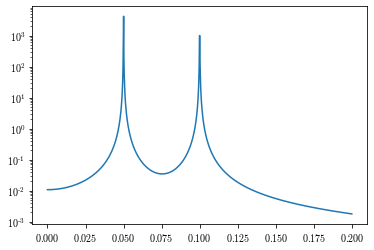

In [16]:
NGreal = analytic_continuation(Y, phis, zspace, lambda z : 0.0)
NGreal_float = np.complex64(NGreal)

plt.figure()
plt.plot(np.real(ω), np.imag(NGreal_float))
plt.yscale('log')
plt.show()

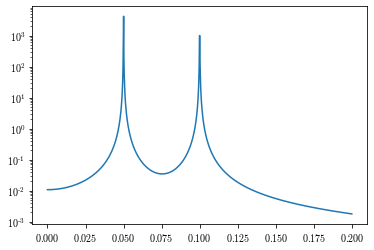

In [22]:
NGreal_other = analytic_continuation(Y, phi_other_ordering, zspace, lambda z : 0)
NGreal_other_float = np.complex64(NGreal_other)

plt.figure()
plt.plot(np.real(ω), np.imag(NGreal_other_float))
plt.yscale('log')
plt.show()

In [35]:
# example of how different the values of $\phi_k$ can get after k = 4. 
np.complex64(phis) - interp_b.schur.phi

array([-3.30289440e-09+0.j, -2.64637873e-08+0.j,  2.34267437e-08+0.j,
       -4.39901815e-09+0.j, -4.72276662e-11+0.j, -2.69876431e+01+0.j,
       -2.46489117e+00+0.j, -5.85977716e+01-0.j,  1.50415993e+00+0.j,
       -1.85325515e+01+0.j,  1.89477086e-01-0.j,  1.07386427e+01+0.j,
        1.59346216e+01+0.j,  4.20793715e+01+0.j,  3.58777834e+00+0.j,
       -5.73640499e+01+0.j,  2.73520300e+00+0.j,  3.23056026e+02+0.j,
       -3.98268476e+01-0.j,  2.79586118e+01+0.j,  1.89678303e+01+0.j,
        5.33101410e+01+0.j, -2.80691051e+01-0.j,  3.88538310e+00+0.j,
        3.68096197e+00+0.j, -1.83166102e+01+0.j, -1.32337030e+00+0.j,
       -1.30563636e+01+0.j, -8.69683890e+01+0.j,  3.31225329e+03+0.j,
        7.06065016e+00+0.j, -1.00139339e+02+0.j,  3.59637074e+00-0.j,
       -1.19109180e+02+0.j, -3.82773659e+00+0.j, -3.51706845e+00+0.j,
       -2.48177314e+01+0.j, -4.98302557e+00-0.j,  3.86592287e+01+0.j,
        8.88909993e+00+0.j,  6.67000995e+00+0.j,  5.94672055e+01+0.j,
        6.45992955e+

TODOs:
- Implement extended precision for Will's code, and a switch to enable / disable it.
- Think about storage: right now the algorithm in ```inverse_problems``` recomputes the matrix product for $[\Theta_k]$ every time it evaluates the function: is there a way to reduce the number of calls it makes or something?
- What's up with the $\phi_k$ values in this example? There are a few things that are weird.
    - Once $\phi_k\approx -1.0$ (at $k = 4$), the values for $\phi_k$ start to drastically diverge if you're using 64-bit precision or 128-bit precision. This doesn't really affect the values of the interpolant, though. In fact, the interpolant is quite stable under these variations, and you can even set $\phi_\ell = 0$ for $\ell > 4$ and still get essentially the same answer. 
    - There must be some criticality condition when 
    $$
    |\phi_k| \approx 1 \iff \phi_k\in\partial\overline{\mathbb D}
    $$
    I should look in the Nevanlinna-Pick paper for information on this, because there's a whole section on criticality. 
    - Also: what do $y_4$ and $\lambda_4$ equal? Presumably there's something weird there that forces $\phi_4\in\partial\overline{\mathbb D}$.
- Do some plotting of solutions as a function of $\phi_k$ values to see what happens (and as a function of $N_{pts}$)
    - Also look at the Pick matrix

# Now extend to more examples and figure out how everything works

In [2]:
# # Use a Gaussian spectral function centered at omega0 with width delOmega
# omega0 = 0.0
# delOmega = 1.0
# T = 64
# rho = lambda omega : 10 * np.exp(- (omega - omega0) ** 2 / (2 * (delOmega ** 2))) / (np.sqrt(2 * np.pi) * delOmega)
# omega_line = np.linspace(-5, 5, 1000)
# def signal(tau):
#     integrand = lambda omega : np.exp(-omega * tau) * rho(omega)
#     return quad(integrand, 0, np.inf)[0]
# rho_dat = np.array([rho(a) for a in omega_line])
# with sns.plotting_context('talk'):
#     fig, ax = plt.subplots(1, figsize = (10, 5))
#     plot_1d_function(ax, omega_line, rho_dat, colors = 'r', legend = False)

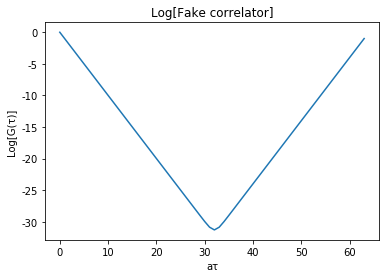

In [3]:
# Single delta spectral function
# m = 0.8
m = 1.
omega0 = m
T = 64
def signal(t):
    return np.exp(- m * t) + np.exp(- m * (T - t))
# x = np.linspace(0.1, T, 1000)
x = np.arange(T)
# x = np.arange(0, T, 1.)
plt.figure()
plt.plot(x, np.log(signal(x)))
plt.title('Log[Fake correlator]')
plt.ylabel('Log[G(τ)]')
plt.xlabel('aτ')
plt.show()

In [4]:
Nreal = 20000
omega_bounds = [-5, 5]
eta = 1e-2
np.random.seed(10)
# taus = np.arange(1, 25, 1.)
taus = np.arange(1, T - 1)
# taus = np.arange(T)
print('Evaluating Greens function at tau = it = ' + str(taus))

Evaluating Greens function at tau = it = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62]


In [5]:
# change this up
theta_mp1 = lambda z : 0
# theta_mp1 = hardy(0)

In [6]:
Y = np.array([gmp.mpc(0, int(t)) for t in taus])
Cfloat = np.array([signal(t) for t in taus])
C = np.array([gmp.mpc(val) for val in Cfloat])
zmesh = np.linspace(omega_bounds[0], omega_bounds[1], num = Nreal)
zspace = np.array([gmp.mpc(z, eta) for z in zmesh])

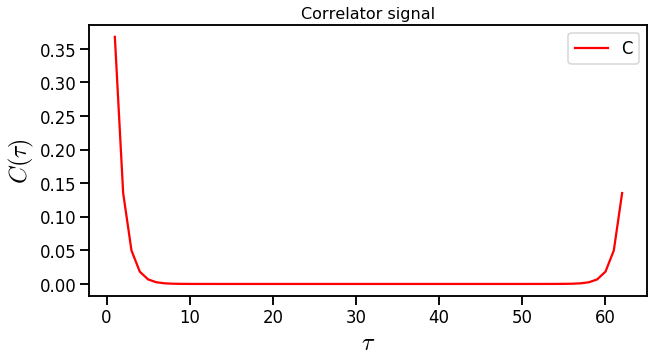

In [7]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize = (10, 5))
    plot_1d_function(ax, taus, Cfloat, fn_label = 'C', ax_label = ['$\\tau$', '$C(\\tau)$'], title = 'Correlator signal')

## FFT then continue

In [8]:
Ctilde_float = np.fft.fft(Cfloat)
Ctilde = np.array([gmp.mpc(z) for z in Ctilde_float])

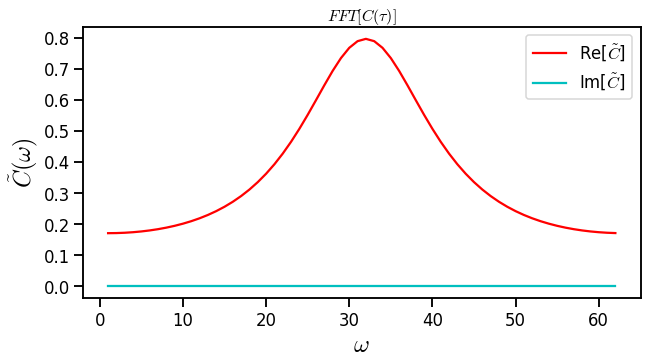

In [9]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize = (10, 5))
    plot_1d_function(ax, taus, np.fft.fftshift(Ctilde_float), fn_label = '$\\tilde{C}$', \
                        ax_label = ['$\\omega$', '$\\tilde{C}(\\omega)$'], title = '$FFT[C(\\tau)]$')

In [10]:
# Try continuing first
lambdas = np.array([h(z) for z in Ctilde])
Pick = construct_Pick(Y, lambdas)
print('Eigs are: ' + str(np.linalg.eigh(np.complex64(Pick))[0]))    # why are the eigenvalues always in \pm pairs?

Eigs are: [-1.5673499e+02 -6.1008372e+00 -3.7290584e-02 -5.6425938e-03
 -7.7918819e-05 -1.8769352e-06 -1.6229826e-06 -1.3129438e-06
 -1.1410693e-06 -9.8616727e-07 -8.7624755e-07 -7.2901173e-07
 -6.1250142e-07 -5.1465616e-07 -4.3380510e-07 -3.5241317e-07
 -3.3115577e-07 -3.0740213e-07 -2.7444301e-07 -2.5236650e-07
 -2.0910282e-07 -1.9643332e-07 -1.7702884e-07 -1.5342025e-07
 -1.1406698e-07 -1.0165312e-07 -8.0435214e-08 -7.5487748e-08
 -3.0773855e-08 -1.8866160e-08  8.7334771e-09  1.9370106e-08
  2.3904910e-08  3.5396422e-08  6.1657985e-08  7.0687371e-08
  9.5846858e-08  1.1103729e-07  1.2908566e-07  1.4590307e-07
  1.6900520e-07  2.0200443e-07  2.4749886e-07  2.5914312e-07
  2.9553664e-07  3.4084840e-07  4.1203700e-07  4.7366359e-07
  5.5752224e-07  6.2034155e-07  7.3972654e-07  8.4140072e-07
  9.0158903e-07  1.2219894e-06  1.3702756e-06  1.5410042e-06
  1.9008164e-06  7.7956742e-05  5.6425603e-03  3.7290592e-02
  6.1008372e+00  1.5673499e+02]


In [11]:
phis = construct_phis(Y, lambdas)
NGreal = analytic_continuation(Y, phis, zspace, theta_mp1)
NGreal_float = np.complex64(NGreal)

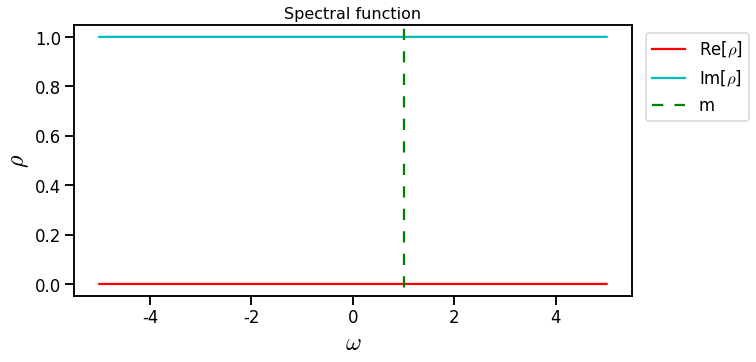

In [12]:
# other contexts: 'paper', 'poster', 'notebook'
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize=(10,5))
    plot_1d_function(ax, zmesh, NGreal_float, ax_label = ['$\\omega$', '$\\rho$'], title = 'Spectral function', \
                    fn_label = '$\\rho$', legend = False)
    add_line(ax, omega0, color = 'g', dashes = (5, 5), label = 'm')
    ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')